In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

df = pd.read_csv('oasis_longitudinal.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [2]:
# Check if 'Visit' column exists before filtering
if 'Visit' in df.columns:
    df = df.loc[df['Visit'] == 1]  # use first visit data only because of the analysis we're doing
    df = df.reset_index(drop=True)  # reset index after filtering first visit data

    # Continue with your other transformations
    df['M/F'] = df['M/F'].replace(['F', 'M'], [0, 1])  # M/F column
    df['Group'] = df['Group'].replace(['Converted'], ['Demented'])  # Target variable
    df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1, 0])  # Target variable
    df = df.drop(['MRI ID', 'Visit', 'Hand'], axis=1)  # Drop unnecessary columns
else:
    print("'Visit' column not found in the DataFrame.")


In [3]:
# bar drawing function
def bar_chart(feature):
    Demented = df[df['Group']==1][feature].value_counts()
    Nondemented = df[df['Group']==0][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))

Text(0.5, 1.0, 'Gender and Demented rate')

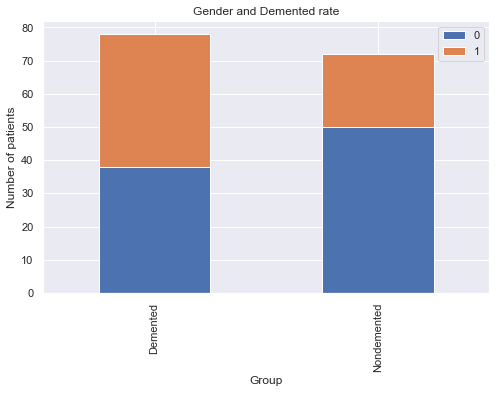

In [4]:
# Gender  and  Group ( Femal=0, Male=1)
bar_chart('M/F')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Gender and Demented rate')

(15.3, 30.0)

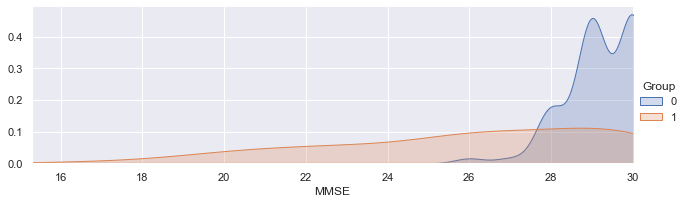

In [5]:
#MMSE : Mini Mental State Examination
# Nondemented = 0, Demented =1
# Nondemented has higher test result ranging from 25 to 30. 
#Min 17 ,MAX 30
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()
plt.xlim(15.30)

(0.6, 0.9)

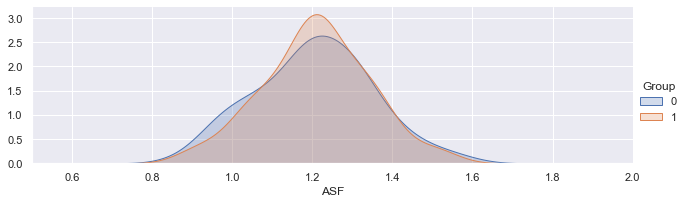

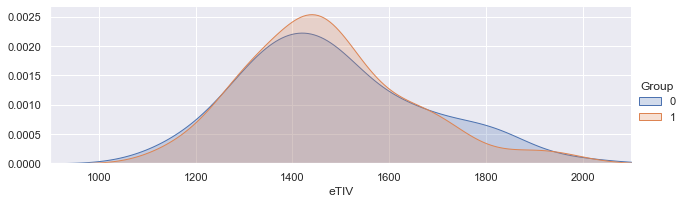

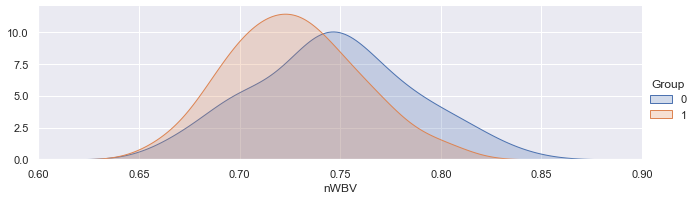

In [6]:
#bar_chart('ASF') = Atlas Scaling Factor
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'ASF',shade= True)
facet.set(xlim=(0, df['ASF'].max()))
facet.add_legend()
plt.xlim(0.5, 2)

#eTIV = Estimated Total Intracranial Volume
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'eTIV',shade= True)
facet.set(xlim=(0, df['eTIV'].max()))
facet.add_legend()
plt.xlim(900, 2100)

#'nWBV' = Normalized Whole Brain Volume
# Nondemented = 0, Demented =1
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'nWBV',shade= True)
facet.set(xlim=(0, df['nWBV'].max()))
facet.add_legend()
plt.xlim(0.6,0.9)

(50.0, 100.0)

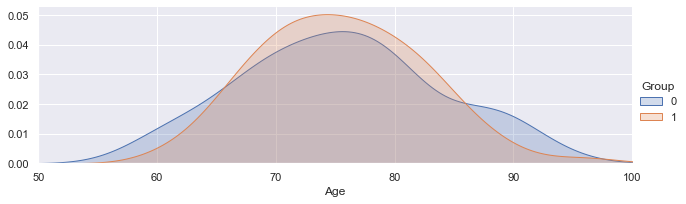

In [7]:
#AGE. Nondemented =0, Demented =0
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(50,100)

(0.0, 0.16)

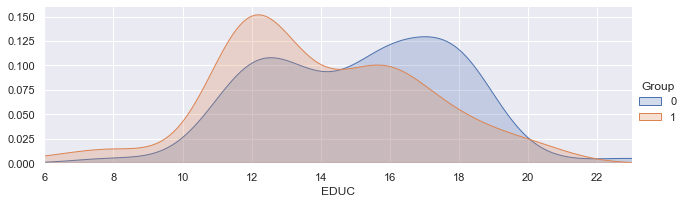

In [8]:
#'EDUC' = Years of Education
# Nondemented = 0, Demented =1
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'EDUC',shade= True)
facet.set(xlim=(df['EDUC'].min(), df['EDUC'].max()))
facet.add_legend()
plt.ylim(0, 0.16)

In [9]:
# Check missing values by each column
pd.isnull(df).sum() 
# The column, SES has 8 missing values

Subject ID    0
Group         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           8
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [10]:
# Dropped the 8 rows with missing values in the column, SES
df_dropna = df.dropna(axis=0, how='any')
pd.isnull(df_dropna).sum()

Subject ID    0
Group         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [11]:
df_dropna['Group'].value_counts()

0    72
1    70
Name: Group, dtype: int64

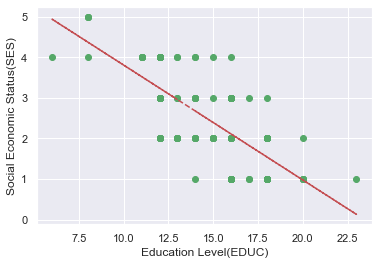

In [12]:
# Draw scatter plot between EDUC and SES
x = df['EDUC']
y = df['SES']

ses_not_null_index = y[~y.isnull()].index
x = x[ses_not_null_index]
y = y[ses_not_null_index]

# Draw trend line in red
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, y, 'go', x, p(x), "r--")
plt.xlabel('Education Level(EDUC)')
plt.ylabel('Social Economic Status(SES)')

plt.show()

In [13]:
df.groupby(['EDUC'])['SES'].median()

EDUC
6     4.0
8     5.0
11    4.0
12    3.0
13    2.0
14    3.0
15    2.0
16    2.0
17    1.0
18    2.0
20    1.0
23    1.0
Name: SES, dtype: float64

In [14]:
df["SES"].fillna(df.groupby("EDUC")["SES"].transform("median"), inplace=True)

In [15]:
# I confirm there're no more missing values and all the 150 data were used.
pd.isnull(df['SES']).value_counts()

False    150
Name: SES, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score

In [17]:
# Dataset with imputation
Y = df['Group'].values # Target for the model
X = df[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']] # Features we use

# splitting into three sets
X_trainval, X_test, Y_trainval, Y_test = train_test_split(
    X, Y, random_state=0)

# Feature scaling
scaler = MinMaxScaler().fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Dataset after dropping missing value rows
Y = df_dropna['Group'].values # Target for the model
X = df_dropna[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']] # Features we use

# splitting into three sets
X_trainval_dna, X_test_dna, Y_trainval_dna, Y_test_dna = train_test_split(
    X, Y, random_state=0)

# Feature scaling
scaler = MinMaxScaler().fit(X_trainval_dna)
X_trainval_scaled_dna = scaler.transform(X_trainval_dna)
X_test_scaled_dna = scaler.transform(X_test_dna)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc

In [20]:
acc = [] # list to store all performance metric

In [21]:
'''from sklearn.model_selection import GridSearchCV

best_score = 0
best_parameters = None

# Define a wider range of values for the regularization parameter C
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']}

# Create a logistic regression model
logRegModel = LogisticRegression()

# Perform grid search with cross-validation
grid_search = GridSearchCV(logRegModel, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_trainval_scaled, Y_trainval)

# Get the best parameters and score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

# Rebuild the model with the best parameters on the combined training and validation set
SelectedLogRegModel = LogisticRegression(C=best_parameters['C'], solver=best_parameters['solver']).fit(X_trainval_scaled, Y_trainval)

test_score = SelectedLogRegModel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedLogRegModel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)

print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", best_parameters['C'])
print("Best parameter for solver is: ", best_parameters['solver'])
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is", test_recall)
print("Test AUC with the best parameters is", test_auc)

m = 'Logistic Regression (w/ imputation)'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])'''



'from sklearn.model_selection import GridSearchCV\n\nbest_score = 0\nbest_parameters = None\n\n# Define a wider range of values for the regularization parameter C\nparam_grid = {\'C\': [0.001, 0.01, 0.1, 1, 10, 100, 1000],\n              \'solver\': [\'lbfgs\', \'liblinear\', \'newton-cg\', \'sag\', \'saga\']}\n\n# Create a logistic regression model\nlogRegModel = LogisticRegression()\n\n# Perform grid search with cross-validation\ngrid_search = GridSearchCV(logRegModel, param_grid, cv=5, scoring=\'accuracy\')\ngrid_search.fit(X_trainval_scaled, Y_trainval)\n\n# Get the best parameters and score\nbest_parameters = grid_search.best_params_\nbest_score = grid_search.best_score_\n\n# Rebuild the model with the best parameters on the combined training and validation set\nSelectedLogRegModel = LogisticRegression(C=best_parameters[\'C\'], solver=best_parameters[\'solver\']).fit(X_trainval_scaled, Y_trainval)\n\ntest_score = SelectedLogRegModel.score(X_test_scaled, Y_test)\nPredictedOutput = 

In [22]:
# Dataset after dropping missing value rows
best_score=0
kfolds=5 # set the number of folds

for c in [0.001, 0.1, 1, 10, 100]:
    logRegModel = LogisticRegression(C=c)
    # perform cross-validation
    scores = cross_val_score(logRegModel, X_trainval_scaled_dna, Y_trainval_dna, cv=kfolds, scoring='accuracy')
    
    # compute mean cross-validation accuracy
    score = np.mean(scores)
    
    # Find the best parameters and score
    if score > best_score:
        best_score = score
        best_parameters = c

# rebuild a model on the combined training and validation set
SelectedLogRegModel = LogisticRegression(C=best_parameters).fit(X_trainval_scaled_dna, Y_trainval_dna)

test_score = SelectedLogRegModel.score(X_test_scaled_dna, Y_test_dna)
PredictedOutput = SelectedLogRegModel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", best_parameters)
print("Test accuracy with best C parameter is", test_score)        
print("Test recall with the best C parameter is", test_recall)
print("Test AUC with the best C parameter is", test_auc)

m = 'Logistic Regression (w/ dropna)'
acc.append([m, test_score, test_recall, test_recall, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.725974025974026
Best parameter for regularization (C) is:  10
Test accuracy with best C parameter is 0.8055555555555556
Test recall with the best C parameter is 0.75
Test AUC with the best C parameter is 0.8194444444444443


In [23]:
# svm 
'''best_score = 0
best_parameter_c = 0
best_parameter_gamma = 0
best_parameter_k = ''

for c_parameter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: # iterate over a range of C values
    for gamma_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: # iterate over a range of gamma values
        for k_parameter in ['rbf', 'linear', 'poly', 'sigmoid']: # iterate over different kernels
            svmModel = SVC(kernel=k_parameter, C=c_parameter, gamma=gamma_paramter, probability=True) # define the model
            
            # perform cross-validation
            scores = cross_val_score(svmModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')
            
            # compute mean cross-validation accuracy
            score = np.mean(scores)
            
            # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score
                best_parameter_c = c_parameter
                best_parameter_gamma = gamma_paramter
                best_parameter_k = k_parameter

# rebuild a model with the best parameters to get a score 
SelectedSVMmodel = SVC(C=best_parameter_c, gamma=best_parameter_gamma, kernel=best_parameter_k, probability=True).fit(X_trainval_scaled, Y_trainval)

test_score = SelectedSVMmodel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedSVMmodel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on cross-validation set is:", best_score)
print("Best parameter for C is: ", best_parameter_c)
print("Best parameter for gamma is: ", best_parameter_gamma)
print("Best kernel is: ", best_parameter_k)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is", test_recall)
print("Test AUC with the best parameters is", test_auc)

m = 'SVM'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])'''



'best_score = 0\nbest_parameter_c = 0\nbest_parameter_gamma = 0\nbest_parameter_k = \'\'\n\nfor c_parameter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: # iterate over a range of C values\n    for gamma_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: # iterate over a range of gamma values\n        for k_parameter in [\'rbf\', \'linear\', \'poly\', \'sigmoid\']: # iterate over different kernels\n            svmModel = SVC(kernel=k_parameter, C=c_parameter, gamma=gamma_paramter, probability=True) # define the model\n            \n            # perform cross-validation\n            scores = cross_val_score(svmModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring=\'accuracy\')\n            \n            # compute mean cross-validation accuracy\n            score = np.mean(scores)\n            \n            # if we got a better score, store the score and parameters\n            if score > best_score:\n                best_score = score\n                best_parameter_c = c_parameter\n     

In [24]:
'''best_score = 0
best_parameter = 0

for md in range(1, 9):  # iterate different maximum depth values
    for criterion in ['gini', 'entropy']:  # iterate over different splitting criteria
        for min_samples_split in range(2, 11):  # iterate over min_samples_split values
            for min_samples_leaf in range(1, 11):  # iterate over min_samples_leaf values
                # train the model
                treeModel = DecisionTreeClassifier(
                    random_state=0, max_depth=md, criterion=criterion,
                    min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf
                )
                
                # perform cross-validation
                scores = cross_val_score(treeModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')
                
                # compute mean cross-validation accuracy
                score = np.mean(scores)
                
                # if we got a better score, store the score and parameters
                if score > best_score:
                    best_score = score
                    best_parameter = {
                        'max_depth': md,
                        'criterion': criterion,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf
                    }

# Rebuild a model with the best parameters on the combined training and validation set        
SelectedDTModel = DecisionTreeClassifier(
    max_depth=best_parameter['max_depth'],
    criterion=best_parameter['criterion'],
    min_samples_split=best_parameter['min_samples_split'],
    min_samples_leaf=best_parameter['min_samples_leaf']
).fit(X_trainval_scaled, Y_trainval)

test_score = SelectedDTModel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedDTModel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)

print("Best accuracy on validation set is:", best_score)
print("Best parameters for the decision tree are:",best_parameter)
print("Test accuracy with the best parameters is ", test_score)
print("Test recall with the best parameters is ", test_recall)
print("Test AUC with the best parameters is ", test_auc)

m = 'Decision Tree'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])'''


'best_score = 0\nbest_parameter = 0\n\nfor md in range(1, 9):  # iterate different maximum depth values\n    for criterion in [\'gini\', \'entropy\']:  # iterate over different splitting criteria\n        for min_samples_split in range(2, 11):  # iterate over min_samples_split values\n            for min_samples_leaf in range(1, 11):  # iterate over min_samples_leaf values\n                # train the model\n                treeModel = DecisionTreeClassifier(\n                    random_state=0, max_depth=md, criterion=criterion,\n                    min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf\n                )\n                \n                # perform cross-validation\n                scores = cross_val_score(treeModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring=\'accuracy\')\n                \n                # compute mean cross-validation accuracy\n                score = np.mean(scores)\n                \n                # if we got a better s

In [25]:
best_score = 0

for M in range(2, 15, 2): # combines M trees
    for d in range(1, 9): # maximum number of features considered at each split
        for m in range(1, 9): # maximum depth of the tree
            # train the model
            # n_jobs(4) is the number of parallel computing
            forestModel = RandomForestClassifier(n_estimators=M, max_features=d, n_jobs=4,
                                          max_depth=m, random_state=0)
        
            # perform cross-validation
            scores = cross_val_score(forestModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')

            # compute mean cross-validation accuracy
            score = np.mean(scores)

            # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score
                best_M = M
                best_d = d
                best_m = m

# Rebuild a model on the combined training and validation set        
SelectedRFModel = RandomForestClassifier(n_estimators=M, max_features=d,
                                          max_depth=m, random_state=0).fit(X_trainval_scaled, Y_trainval )

PredictedOutput = SelectedRFModel.predict(X_test_scaled)
test_score = SelectedRFModel.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameters of M, d, m are: ", best_M, best_d, best_m)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is:", test_recall)
print("Test AUC with the best parameters is:", test_auc)

m = 'Random Forest'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.8035573122529645
Best parameters of M, d, m are:  2 5 7
Test accuracy with the best parameters is 0.868421052631579
Test recall with the best parameters is: 0.8
Test AUC with the best parameters is: 0.8722222222222222


In [26]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedRFModel.feature_importances_)]).T

Feature importance: 


array([['M/F', '0.03503132427481025'],
       ['Age', '0.09551237125526228'],
       ['EDUC', '0.06261556797214127'],
       ['SES', '0.060620327518549066'],
       ['MMSE', '0.4006565962793097'],
       ['eTIV', '0.07005497528287095'],
       ['nWBV', '0.1460571117936201'],
       ['ASF', '0.1294517256234364']], dtype='<U32')

In [27]:
import lightgbm as lgb

best_score = 0
best_params = {}

for num_leaves in [31, 63, 127]:  # Try different values for num_leaves
    for learning_rate in [0.05, 0.1, 0.2]:  # Try different learning rates
        params = {
            'objective': 'binary',
            'boosting_type': 'gbdt',
            'num_leaves': num_leaves,
            'learning_rate': learning_rate,
            'metric': 'binary_logloss'
        }

        lgb_model = lgb.train(params, lgb.Dataset(X_trainval_scaled, Y_trainval))
        test_predictions = lgb_model.predict(X_test_scaled, num_iteration=lgb_model.best_iteration)

        # Calculate accuracy or other metrics based on test_predictions and Y_test
        test_accuracy = accuracy_score(Y_test, (test_predictions >= 0.5).astype(int))

        if test_accuracy > best_score:
            best_score = test_accuracy
            best_params = {'num_leaves': num_leaves, 'learning_rate': learning_rate}

print("Best accuracy on the test set is:", best_score)
print("Best parameters are:", best_params)


[LightGBM] [Info] Number of positive: 58, number of negative: 54
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 159
[LightGBM] [Info] Number of data points in the train set: 112, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.517857 -> initscore=0.071459
[LightGBM] [Info] Start training from score 0.071459
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 159
[LightGBM] [Info] Number of data points in the train set: 112, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.517857 -> initscore=0.071459
[LightGBM] [Info] Start training from score 0.071459
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [28]:
# Performance Metric for each model
result = pd.DataFrame(acc, columns=['Model', 'Accuracy', 'Recall', 'AUC', 'FPR', 'TPR', 'TH'])
result[['Model', 'Accuracy', 'Recall', 'AUC']]

,Model,Accuracy,Recall,AUC
0,Logistic Regression (w/ dropna),0.805556,0.75,0.750000
1,Random Forest,0.868421,0.80,0.872222


In [29]:
#import pickle

In [30]:
#pickle.dump( forestModel,open('alz_random_forest.pkl','wb'))

In [31]:
#model_loaded=pickle.load(open(r'C:\Users\utkar\Desktop\mini2\alz_random_forest.pkl','rb'))

In [32]:
#import joblib

In [33]:
#joblib.dump(forestModel,'model_saved2')

In [34]:
#loaded_model2=joblib.load(r'C:\Users\utkar\Desktop\mini2\model_saved2')

In [35]:
#loaded_model2

In [36]:
import joblib
import numpy as np

In [37]:
def load_model(model_path):
    try:
        model = joblib.load(model_path)
        return model
    except Exception as e:
        print(f"Error loading the model: {str(e)}")
        return None

In [38]:
def make_predictions(model, input_data):
    try:
        input_data = np.array([input_data])  # Convert input to a numpy array if needed
        predictions = model.predict(input_data)
        return predictions
    except Exception as e:
        print(f"Error making predictions: {str(e)}")
        return None

In [39]:
if _name_ == '_main_':
    model_path = 'model.pickle'  # Path to your saved model
    loaded_model = load_model(model_path)
    if loaded_model:
        sample_input = 'Your sample input data here'
        predictions = make_predictions(loaded_model, sample_input)
        if predictions is not None:
            print(f'Predicted class: {predictions[0]}')
    else:
        print('Model loading failed.')

NameError: name '_name_' is not defined

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement dataread
ERROR: No matching distribution found for dataread
